<img src="https://raw.githubusercontent.com/UCLAMAEThreads/FluidDynTools.jl/main/notebook/logo_UCLA_blue_boxed.svg" alt="ucla logo" width="150" align="left"/>

### **Introduction to Fluid Dynamics**
<hr />

# The Blasius and Falkner-Skan boundary layers

This notebook focuses on the solution of the boundary layer equations when the
external velocity outside the boundary layer has the form of flow past a wedge,
as in the diagram below:

<img src="https://raw.githubusercontent.com/UCLAMAEThreads/MAE150A/master/notebook/WedgeDiagram.svg" alt="wedge diagram" width="600" align="left"/>

For the flow past a wedge with half-angle $\beta/2$, potential flow theory predicts
that the external velocity has the form,
$$U_e(x) = A x^{m}$$
where $A$ is a positive constant and
$$ m = \frac{\beta}{2-\beta}$$

Our focus here is on the boundary layer that develops along the wall of the wedge.
The boundary-layer flow has a **self-similar form** as it develops along the $x$ direction. Just as the Rayleigh flow develops with the same profile shape in time, with a time-varying thickness $\delta(t) = (\nu t)^{1/2}$, the boundary layer's profile has the same shape at every $x$ location, but with **spatially-varying thickness** proportional to
$$\delta(x) = \left( \frac{\nu x}{U_e(x)}\right)^{1/2}$$

This means that the velocity tangent to the wall can be written in the form
$$ u(x,y) = U_e(x) F'(\eta) $$
where
$$\eta = \dfrac{y}{\delta(x)}$$

With this form, the boundary layer equations reduce to an ordinary differential
equation for $F$ in this case,

$$ F''' + \frac{1}{2} (m+1) F F'' + m (1-F'^2)  = 0$$

This is called the **Falkner-Skan equation**. The equation is non-linear, however,
and must be solved computationally. The tools to solve it are provided for you here.

#### Boundary conditions
The boundary conditions on the flow are no-slip ($u = 0$ at $y = 0$), no-flow-through
($v = 0$ at $y = 0$). Also, the flow must approach the external velocity outside
the boundary layer. This means $u \rightarrow U_e$ as $y \rightarrow \infty$.

#### Special cases
The case $\beta = 0$ (so that $m = 0$) corresponds to a flat plate, parallel to
free stream, and $U_e(x) = U_\infty$. This is called a **Blasius boundary layer**.

When $\beta > 0$, the external flow is accelerating, and the pressure gradient
is said to be **favorable**.

When $\beta < 0$, the external flow is decelerating, and the pressure gradient
is adverse. The lowest admissible value of $\beta$ is approximately $-0.1999$.
Below this, the boundary layer equations do not hold.

#### Other boundary-layer quantities
*Every* measure of thickness of the boundary layer is proportional to $\delta(x)$.
However, we need the solution of the Falkner-Skan equation to determine what
the constant of proportionality is.

For example, the 99% thickness is

$$\delta_{99}(x) = C_{1}\delta(x)$$

the displacement thickness is

$$\delta^{*}(x) = C_{2} \delta(x)$$

and the momentum thickness is

$$\theta(x) = C_{3} \delta(x)$$

These constants $C_1$, $C_2$ and $C_3$ depend on $\beta$, and they can only be
found by solving the Falkner-Skan problem.

Another quantity of interest is the **skin friction coefficient**,

$$c_{f} = \dfrac{\tau_{w}}{\frac{1}{2} \rho U_e^2} $$

It can be shown that the skin friction coefficient of a Falkner-Skan boundary layer must be of the form

$$c_{f} = \dfrac{C_4}{(U_e(x) x/\nu)^{1/2}} $$

As with the other constants, $C_4$ can only be found by solving the Falkner-Skan
equation.

### Set up the module

In [1]:
using FluidDynTools

In [2]:
using Plots

### Generate the velocity profile and other solution features
Here, we will compute the self-similar velocity profile and compute other
boundary-layer quantities. The only required input for this `falknerskan` function
is $\beta$.

It returns a data structure with all of the data we will need, including the velocity profile.
(Use `?falknerskan` for details.)

In [3]:
β = 0.0
fs = falknerskan(β);

For example, the proportionality constant on the 99 percent thickness is

In [4]:
fs.d99

4.910007683995137

which means that, for $\beta = 0$,

$$\delta_{99}(x) = 4.91 \sqrt{\dfrac{\nu x}{U_e}} $$

or, in other words,

$$\dfrac{\delta_{99}(x)}{x} = \dfrac{4.91}{\sqrt{Re_x}} $$

Similarly, the momentum thickness:

In [5]:
fs.theta

0.6641299724913218

so that

$$\dfrac{\theta(x)}{x} = \dfrac{0.664}{\sqrt{Re_x}} $$

#### Let's plot the profile

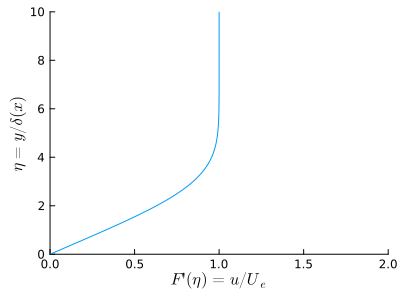

In [6]:
plot(fs.u,fs.eta,xlim=(0,2),ylim=(0,maximum(fs.eta)),xlabel=L"F'(\eta) = u/U_e",ylabel=L"\eta = y/\delta(x)")

#### Drag force
When $\beta = 0$ (Blasius), the drag coefficient on a plate of length $L$ is equal to

$$C_D = \dfrac{4\theta(L)}{L} = \dfrac{2.656}{\sqrt{Re_L}}$$

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*